In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('LN5iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = data.drop('species',axis='columns')
Y = data.species

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)
print(X_train.shape)
print(Y_train.shape)


(105, 4)
(105,)


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(max_iter=500, activation='relu',hidden_layer_sizes=20)
mlp

MLPClassifier(hidden_layer_sizes=20, max_iter=500)

In [ ]:
mlp.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=20, max_iter=500)

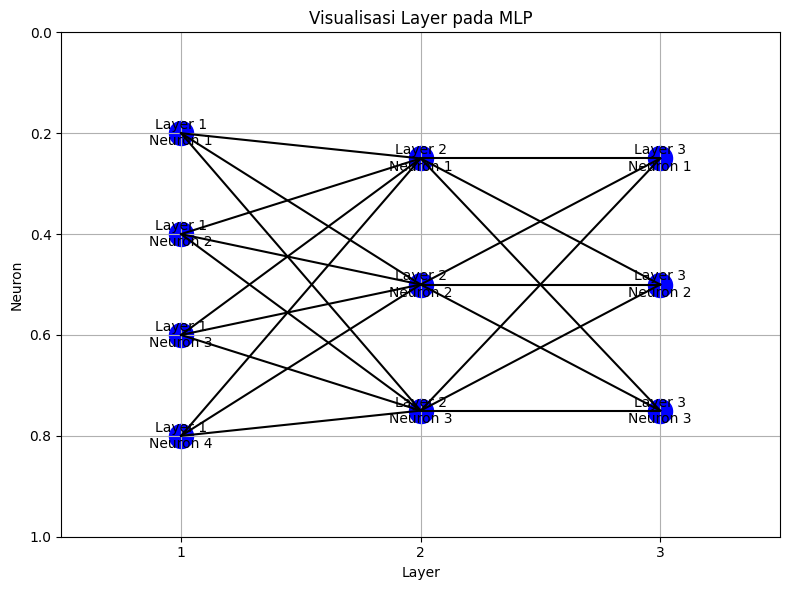

In [37]:
import matplotlib.pyplot as plt

def visualize_layers(layer_sizes):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Menggambar neuron untuk setiap lapisan
    for i, size in enumerate(layer_sizes):
        layer_height = 1.0 / (size + 1)
        for j in range(size):
            neuron_x = i + 1
            neuron_y = (j + 1) * layer_height
            ax.scatter(neuron_x, neuron_y, color='blue', s=300)
            # Tambahkan teks untuk menunjukkan jumlah neuron di setiap lapisan
            ax.text(neuron_x, neuron_y, f'Layer {i+1}\nNeuron {j+1}', ha='center', va='center', fontsize=10)

    # Menghubungkan neuron antar lapisan
    for i in range(len(layer_sizes) - 1):
        current_layer_size = layer_sizes[i]
        next_layer_size = layer_sizes[i + 1]
        current_layer_height = 1.0 / (current_layer_size + 1)
        next_layer_height = 1.0 / (next_layer_size + 1)
        for j in range(current_layer_size):
            for k in range(next_layer_size):
                current_neuron_x = i + 1
                current_neuron_y = (j + 1) * current_layer_height
                next_neuron_x = i + 2
                next_neuron_y = (k + 1) * next_layer_height
                ax.plot([current_neuron_x, next_neuron_x], [current_neuron_y, next_neuron_y], color='black')

    ax.set_title('Visualisasi Layer pada MLP')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Neuron')
    ax.set_xlim(0.5, len(layer_sizes) + 0.5)
    ax.set_ylim(0, 1)
    ax.invert_yaxis()
    ax.grid(True)
    plt.xticks(range(1, len(layer_sizes) + 1))
    plt.tight_layout()
    plt.show()

# Contoh struktur lapisan MLP: 3 input, 4 hidden, 3 output
layer_sizes = [4,3, 3]
visualize_layers(layer_sizes)


In [ ]:
pred = mlp.predict(X_test)
pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor'], dtype='<U15')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(Y_test,pred)

array([[12,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 17]])

In [ ]:
print(classification_report(Y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.94      1.00      0.97        17

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

